In [158]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [159]:
import matplotlib.pylab as pylab

params = {'axes.labelsize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'legend.fontsize': 'x-large',
          #'font.size': 16,
          'axes.titlesize': 'x-large',
          'figure.titlesize': 'x-large',}
pylab.rcParams.update(params)

In [160]:
df_PPO = pd.read_csv(r'20 bin PPO 500 results\MMDs.csv',
                     index_col=0,)
df_SAC = pd.read_csv(r'default SAC 500 norm space results\MMDs.csv',
                     index_col=0,
                     ).drop(index='baseline_alternated_MMD') #useless outlier

filter the dataset

In [161]:
pattern = 'MMD_baseline_random_daily_samples'
df_PPO_bline = df_PPO[df_PPO.index.str.contains(pattern)]
df_SAC_bline = df_SAC[df_SAC.index.str.contains(pattern)]

In [162]:
df_PPO_bline.describe()

,MMD,p_value
count,100.000000,100.000000
mean,0.000418,0.688705
std,0.000082,0.290317
min,0.000331,0.003000
25%,0.000366,0.522325
50%,0.000397,0.778450
75%,0.000436,0.943900
max,0.000816,0.999800


In [163]:
df_SAC_bline.describe()

,MMD,p_value
count,103.000000,103.000000
mean,0.000399,0.735969
std,0.000060,0.277930
min,0.000319,0.062400
25%,0.000355,0.573150
50%,0.000391,0.817400
75%,0.000428,0.976550
max,0.000589,1.000000


In [164]:
df_combine_bline = pd.concat([df_PPO_bline,df_SAC_bline], ignore_index=True)

In [165]:
df_combine_bline.describe()

,MMD,p_value
count,203.000000,203.000000
mean,0.000408,0.712686
std,0.000072,0.284383
min,0.000319,0.003000
25%,0.000358,0.535800
50%,0.000392,0.809800
75%,0.000433,0.970500
max,0.000816,1.000000


In [166]:
df_SAC['category'] = ['baseline' if pattern in index else index for index in df_SAC.index]

In [167]:
legend_names = ['eps=0.03 PGD Bifrucated, Toggle-Targeted, Masked Temporal Features',
 'eps=0.03 PGD Bifrucated, Masked Temporal Features',
 'eps=0.05 PGD Bifrucated, Masked Temporal Features',
 'eps=0.05 PGD Bifrucated',
 'eps=0.03 PGD Bifrucated, Masked Temporal Features, Scaled eps for Solar Generation and Net Consumption',
 'eps=0.03 PGD Bifrucated, Masked Temporal and Solar Generation Features, Scaled eps for Net Consumption',
 'eps=0.03 PGD Bifrucated, Masked Temporal and Solar Generation Features, Scaled eps for Net Consumption, Clipped Observations',
 'eps=0.03 PGD Bifrucated, Toggle-Targeted, Masked Temporal and Solar Generation Features, Scaled eps for Net Consumption, Clipped Observations',
 'baseline',
 'eps=0.03 ACG Bifrucated, Masked* Temporal Features',]

Plot data my category, so the baseline data is grouped but the attacks are not

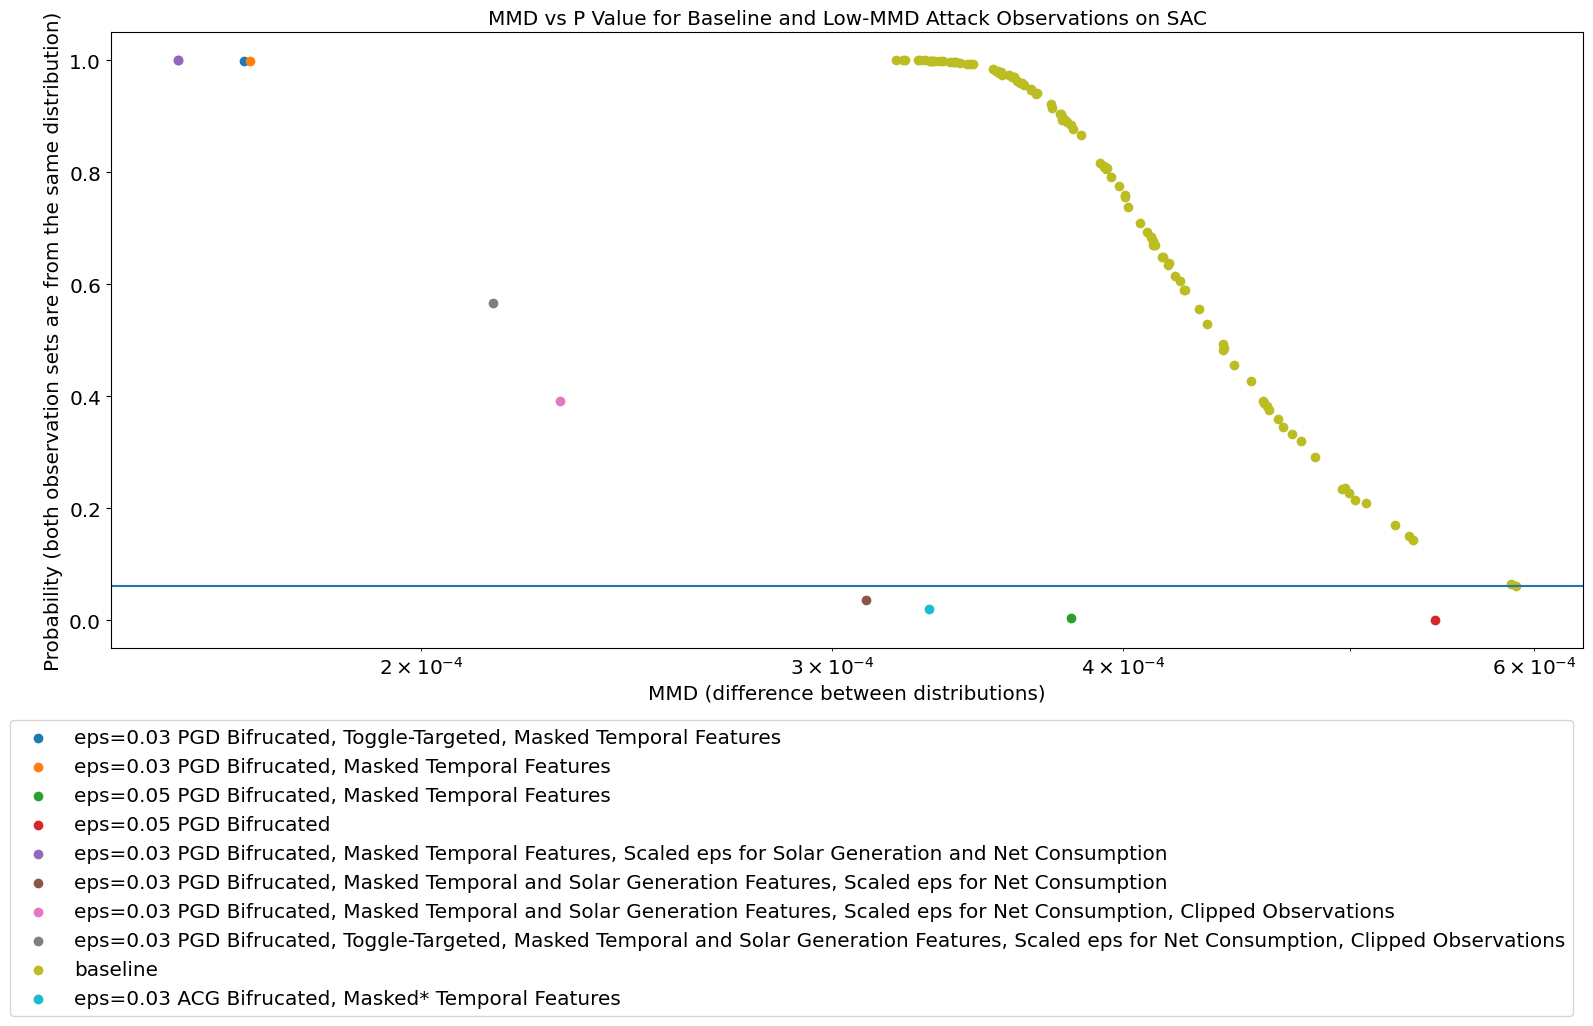

<Figure size 640x480 with 0 Axes>

In [168]:
plt.figure(figsize=(19, 8))
for category in df_SAC['category'].unique():
    plt.scatter(df_SAC[df_SAC['category'] == category]['MMD'], 
                df_SAC[df_SAC['category'] == category]['p_value'], 
                label=category,
                marker='o'
                )

plt.legend(legend_names,
           bbox_to_anchor=(1.0, -0.1))
plt.xlabel('MMD (difference between distributions)')
plt.ylabel('Probability (both observation sets are from the same distribution)')
plt.title('MMD vs P Value for Baseline and Low-MMD Attack Observations on SAC')
plt.axhline(df_SAC_bline['p_value'].min()) #pval threashold
plt.xscale('log')
plt.show()
plt.tight_layout()

Note the MMD difference between the blue an green points, where the only change is the time mask (pval is unchanged). If ART is improperly masking features, it would explain the higher MMDs

In [169]:
SAC_atk_pval = df_SAC[df_SAC['category'] != 'baseline']['p_value'].to_frame()
SAC_bline_pval = df_SAC[df_SAC['category'] == 'baseline']['p_value']

In [170]:
SAC_atk_pval['percentile'] = stats.percentileofscore(SAC_bline_pval, SAC_atk_pval['p_value'])

For the SAC attacks, here are the pvalues and their corresponding percentiles with the random daily baseline distribution

In [171]:
SAC_atk_pval

,p_value,percentile
toggle_binary_myPGD_03_mask_time,0.9984,87.378641
untargeted_binary_myPGD_03_mask_time,0.9987,88.349515
untargeted_binary_myPGD_05_mask_time,0.0048,0.000000
untargeted_binary_myPGD_05,0.0001,0.000000
untargeted_binary_myPGD_03_mask_time_scale_solar_and_consumption_eps,1.0000,99.514563
bifurcated_uACG_DLloss_03_mask_time_solar_and_consumption,0.0365,0.000000
untargeted_binary_myPGD_03_mask_solar_and_time_scale_consumption_eps_clipped_adv_obs,0.3926,18.446602
toggle_binary_myPGD_03_mask_time_and_solar_scale_consumption_eps_clipped,0.5675,25.242718
untargeted_binary_myPGD_03_mask_time_scale_solar_and_consumption_eps,1.0000,99.514563
uACG_binary_SAC_03_eps,0.0211,0.000000


Plot KPIs from plotted attacks

In [172]:
df_SAC['category'].unique().tolist() + ['cost_function']

['toggle_binary_myPGD_03_mask_time',
 'untargeted_binary_myPGD_03_mask_time',
 'untargeted_binary_myPGD_05_mask_time',
 'untargeted_binary_myPGD_05',
 'untargeted_binary_myPGD_03_mask_time_scale_solar_and_consumption_eps',
 'bifurcated_uACG_DLloss_03_mask_time_solar_and_consumption',
 'untargeted_binary_myPGD_03_mask_solar_and_time_scale_consumption_eps_clipped_adv_obs',
 'toggle_binary_myPGD_03_mask_time_and_solar_scale_consumption_eps_clipped',
 'baseline',
 'uACG_binary_SAC_03_eps',
 'cost_function']

In [173]:
cols = ['toggle_binary_myPGD_03_mask_time',
 'untargeted_binary_myPGD_03_mask_time',
 'untargeted_binary_myPGD_5%_mask_time',
 'untargeted_binary_myPGD_5%',
 'untargeted_binary_myPGD_03_mask_time_scale_solar_and_consumption_eps',
 'bifurcated_uACG_DLloss_03_mask_time_solar_and_consumption',
 'untargeted_binary_myPGD_03_mask_solar_and_time_scale_consumption_eps_clipped_adv_obs',
 'toggle_binary_myPGD_03_mask_time_and_solar_scale_consumption_eps_clipped',
 'baseline',
 'uACG_binary_SAC_03_eps',
 'cost_function']
df_SAC_KPI = pd.read_csv('default SAC 500 norm space results\KPIs.csv',
                        usecols=cols,
                        index_col=0)

KPIs to plot

In [174]:
key_kpi = ['cost_total','daily_peak_average','electricity_consumption_total','ramping_average']

In [175]:
df_SAC_adv_regret = df_SAC_KPI.loc[key_kpi].drop(columns='baseline').sub(df_SAC_KPI.loc[key_kpi]['baseline'].values, axis='rows')

Sorting the KPIs by electircal consumption also sorts the attacks by budget! These are proportional because electrical consumption was the basis for the victim's reward

In [176]:
legend_names = {'toggle_binary_myPGD_03_mask_time':'eps=0.03 PGD Bifrucated, Toggle-Targeted, Masked Temporal Features',
 'untargeted_binary_myPGD_03_mask_time':'eps=0.03 PGD Bifrucated, Masked Temporal Features',
 'untargeted_binary_myPGD_5%_mask_time':'eps=0.05 PGD Bifrucated, Masked Temporal Features',
 'untargeted_binary_myPGD_5%':'eps=0.05 PGD Bifrucated',
 'untargeted_binary_myPGD_03_mask_time_scale_solar_and_consumption_eps':'eps=0.03 PGD Bifrucated, Masked Temporal Features,\nScaled eps for Solar Generation and Net Consumption',
 'bifurcated_uACG_DLloss_03_mask_time_solar_and_consumption':'eps=0.03 PGD Bifrucated, Masked Temporal and Solar Generation Features,\nScaled eps for Net Consumption',
 'untargeted_binary_myPGD_03_mask_solar_and_time_scale_consumption_eps_clipped_adv_obs':'eps=0.03 PGD Bifrucated, Masked Temporal and Solar Generation Features,\nScaled eps for Net Consumption, Clipped Observations',
 'toggle_binary_myPGD_03_mask_time_and_solar_scale_consumption_eps_clipped':'eps=0.03 PGD Bifrucated, Toggle-Targeted, Masked Temporal and Solar Generation Features,\nScaled eps for Net Consumption, Clipped Observations',
 'uACG_binary_SAC_03_eps':'eps=0.03 ACG Bifrucated, Masked* Temporal Features',}

Text(0.5, 1.0, 'Adversarial Regret for Low-MMD Attacks on SAC')

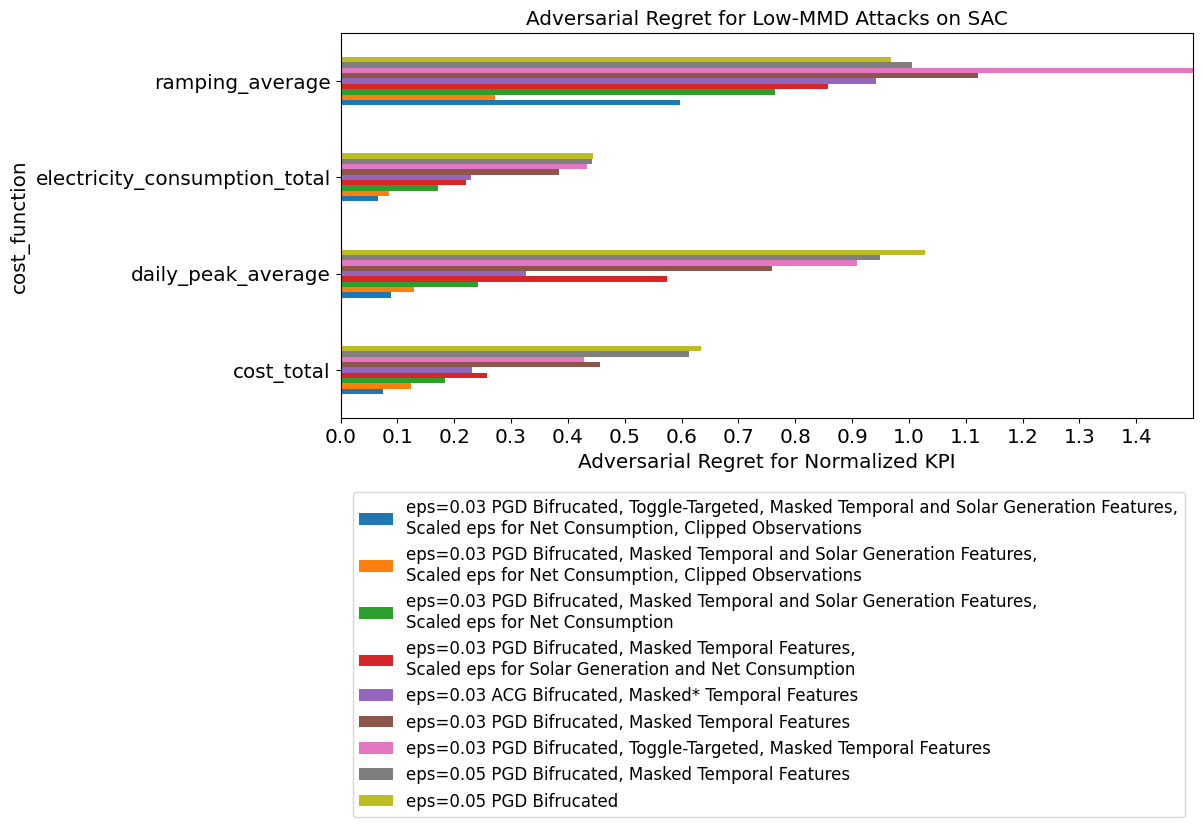

In [177]:
df_SAC_adv_regret.rename(columns=legend_names, inplace=True)
x_max = 1.5
x_min = 0.0
#sorting by column won't change the order of the columns, so we have to sort by rows and transpose instead
df_SAC_adv_regret = df_SAC_adv_regret.T.sort_values(by='electricity_consumption_total').T
ax = df_SAC_adv_regret.plot.barh(figsize=(11,5),
                                 )
ax.legend(#legend_names,
          bbox_to_anchor=(1.0, -0.17),
          fontsize='large')
ax.set_xlabel('Adversarial Regret for Normalized KPI')
ax.set_xlim(x_min,x_max)
ax.set_xticks(np.arange(x_min,x_max,0.1))
ax.set_title('Adversarial Regret for Low-MMD Attacks on SAC')

Caption:
- Ramping for the toggle_binary_myPGD_03_mask_time is 3.5, which skews the rest of the plot
- Only attacks which were in the baseline MMD distribution are shown
- $\epsilon = 0$ for masked features
- Clipped adversarial observations have all features in [0,1]

In [178]:
df_PPO_plot = df_PPO[~df_PPO.index.str.contains('_fillna')].drop(index=['bifurcated_uACG_DLloss_03_mask_time_solar_and_consumption','binary_uACG_CW5'])
df_PPO_plot = df_PPO_plot.sort_values(by='MMD')

In [179]:
legend_names = ['eps=[0.01,0.07] ACG, Masked* Temporal Features',
                'eps=0.03 PGD Bifrucated, Masked Temporal Features, Scaled eps for Solar Generation and Net Consumption',
                'baseline',
                'eps=0.03 PGD Bifrucated, Masked Temporal, Solar Generation and Net Consumption Features',
                'eps=0.05 ACG Bifrucated, Masked* Temporal Features']

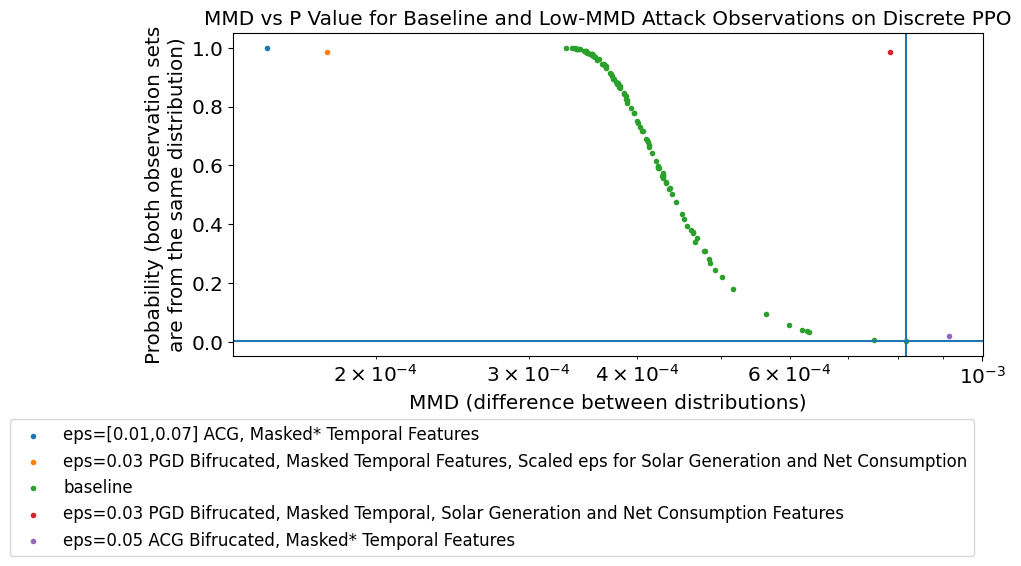

In [180]:
df_PPO_plot['category'] = ['baseline' if pattern in index else index for index in df_PPO_plot.index]
plt.figure(figsize=(10, 6))
for category in df_PPO_plot['category'].unique():
    plt.scatter(df_PPO_plot[df_PPO_plot['category'] == category]['MMD'], 
                df_PPO_plot[df_PPO_plot['category'] == category]['p_value'], 
                label=category,
                marker='.'
                )

plt.legend(legend_names,
           bbox_to_anchor=(1.0, -0.17),
           fontsize='large')
plt.xlabel('MMD (difference between distributions)')
plt.ylabel('Probability (both observation sets\nare from the same distribution)')
plt.title('MMD vs P Value for Baseline and Low-MMD Attack Observations on Discrete PPO')
plt.axhline(df_PPO_bline['p_value'].min()) #pval threashold, should this be at 1.5 std like a box plot?
plt.axvline(df_PPO_bline['MMD'].max())
plt.xscale('log')
plt.tight_layout()
plt.show()

- Only includes attacks with visible adv regret
-  because ART's mask is weird, does that affect the MMD?

In [181]:
PPO_atk_pval = df_PPO_plot[df_PPO_plot['category'] != 'baseline']['p_value'].to_frame()
PPO_bline_pval = df_PPO_plot[df_PPO_plot['category'] == 'baseline']['p_value']
PPO_atk_pval['percentile'] = stats.percentileofscore(PPO_bline_pval, PPO_atk_pval['p_value'])

MMD/Pvals required for other attacks in thesis table attak_MMDs

In [182]:
df_PPO_plot[df_PPO_plot['category'] != 'baseline']

,MMD,p_value,category
dynamic_uACG,0.000150,1.0000,dynamic_uACG
untargeted_binary_myPGD_03_mask_time_scale_solar_and_consumption_eps,0.000176,0.9841,untargeted_binary_myPGD_03_mask_time_scale_sol...
bifurcated_uACG_DLloss_03_mask_time_solar_and_consumption_notna,0.000783,0.9837,bifurcated_uACG_DLloss_03_mask_time_solar_and_...
uACG_CWloss_05_eps_notna,0.000914,0.0229,uACG_CWloss_05_eps_notna


In [183]:
PPO_atk_pval

,p_value,percentile
dynamic_uACG,1.0000,100.0
untargeted_binary_myPGD_03_mask_time_scale_solar_and_consumption_eps,0.9841,88.0
bifurcated_uACG_DLloss_03_mask_time_solar_and_consumption_notna,0.9837,88.0
uACG_CWloss_05_eps_notna,0.0229,2.0


Load data from first csv

In [184]:
cols = ['untargeted_acg',
        'untargeted_binary_myPGD_03_mask_time_scale_solar_and_consumption_eps',
        'baseline',
        'cost_function']
df_PPO_KPI = pd.read_csv(r'20 bin PPO 500 results\KPIs.csv',
                        usecols=cols,
                        index_col=0)

Merge with second csv

In [185]:
cols = ['uACG CWloss 5% eps',
        'bifurcated_uACG_DLloss_03_mask_time_solar_and_consumption',
        'cost_function']
df_PPO_KPI = df_PPO_KPI.merge(pd.read_csv(r'20 bin PPO 500 results\binary classifier uACG results\KPIs.csv',
                                usecols=cols,
                                index_col=0),
                                left_index=True,
                                right_index=True,
                                how='outer')

In [186]:
df_PPO_adv_regret = df_PPO_KPI.loc[key_kpi].drop(columns='baseline').sub(df_PPO_KPI.loc[key_kpi]['baseline'].values, axis='rows')

In [187]:
df_PPO_adv_regret

,untargeted_acg,untargeted_binary_myPGD_03_mask_time_scale_solar_and_consumption_eps,uACG CWloss 5% eps,bifurcated_uACG_DLloss_03_mask_time_solar_and_consumption
cost_function,,,,
cost_total,0.029194,0.034534,0.097465,0.036344
daily_peak_average,0.066612,0.060246,0.203274,0.059381
electricity_consumption_total,0.031609,0.024627,0.062059,0.023753
ramping_average,0.178104,0.142430,0.339129,0.130867


In [188]:
df_PPO_adv_regret.columns

Index(['untargeted_acg',
       'untargeted_binary_myPGD_03_mask_time_scale_solar_and_consumption_eps',
       'uACG CWloss 5% eps',
       'bifurcated_uACG_DLloss_03_mask_time_solar_and_consumption'],
      dtype='object')

In [189]:
legend_names = ['eps=[0.01,0.07] ACG, Masked* Temporal Features',
                'eps=0.03 PGD Bifrucated, Masked Temporal Features, Scaled eps for Solar Generation and Net Consumption',
                'eps=0.05 ACG Bifrucated, Masked* Temporal Features',
                'eps=0.03 ACG Bifrucated, Masked* Temporal, Solar Generation and Net Consumption Features',
]

In [190]:
df_PPO_adv_regret.columns = legend_names
df_PPO_adv_regret.sort_values(by='electricity_consumption_total', axis='columns')

,"eps=0.03 ACG Bifrucated, Masked* Temporal, Solar Generation and Net Consumption Features","eps=0.03 PGD Bifrucated, Masked Temporal Features, Scaled eps for Solar Generation and Net Consumption","eps=[0.01,0.07] ACG, Masked* Temporal Features","eps=0.05 ACG Bifrucated, Masked* Temporal Features"
cost_function,,,,
cost_total,0.036344,0.034534,0.029194,0.097465
daily_peak_average,0.059381,0.060246,0.066612,0.203274
electricity_consumption_total,0.023753,0.024627,0.031609,0.062059
ramping_average,0.130867,0.142430,0.178104,0.339129


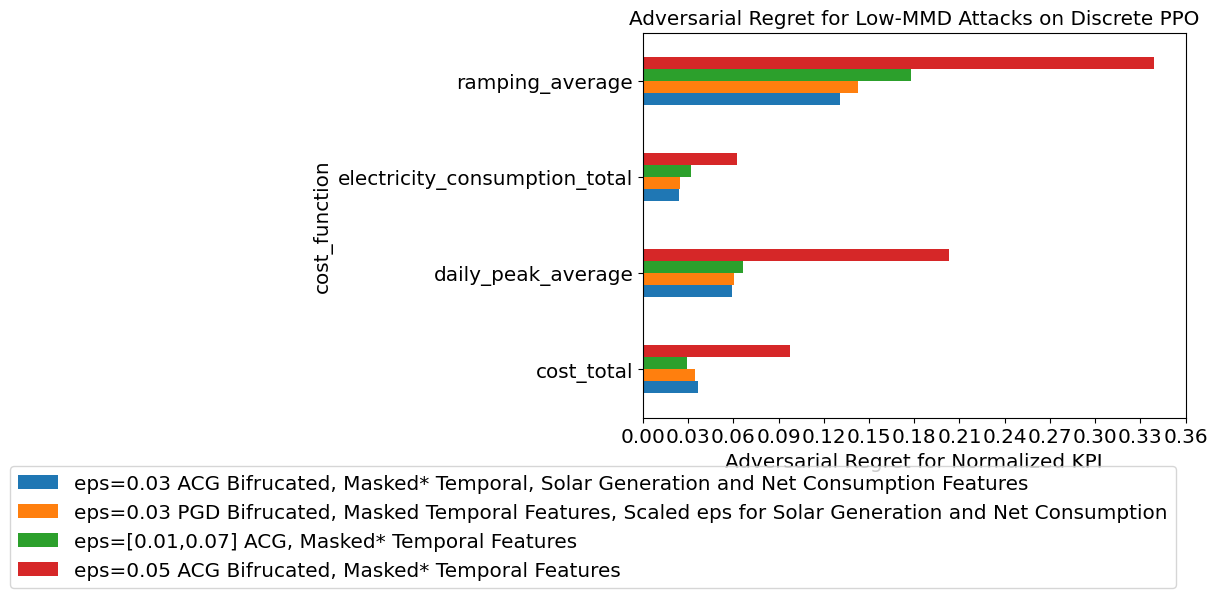

In [191]:
df_PPO_adv_regret.columns = legend_names
df_PPO_adv_regret.sort_values(by='electricity_consumption_total', axis='columns', inplace=True)
ax = df_PPO_adv_regret.plot.barh(figsize=(7,5))
ax.legend(#legend_names,
          bbox_to_anchor=(1.0, -0.1))
ax.set_xlabel('Adversarial Regret for Normalized KPI')
ax.set_title('Adversarial Regret for Low-MMD Attacks on Discrete PPO')
ax.set_xticks(np.arange(0,0.37,0.03))

In [192]:
df_PPO.index

Index(['binary_uACG_CW10_fillna', 'binary_uACG_CW5_fillna', 'binary_uACG_CW5',
       'untargeted_binary_myPGD_03_mask_time_scale_solar_and_consumption_eps',
       'bifurcated_uACG_DLloss_03_mask_time_solar_and_consumption',
       'bifurcated_uACG_DLloss_03_mask_time_solar_and_consumption_fillna',
       'dynamic_uACG', 'MMD_baseline_random_daily_samples_0',
       'MMD_baseline_random_daily_samples_1',
       'MMD_baseline_random_daily_samples_2',
       ...
       'MMD_baseline_random_daily_samples_72',
       'MMD_baseline_random_daily_samples_73',
       'MMD_baseline_random_daily_samples_74',
       'MMD_baseline_random_daily_samples_75',
       'MMD_baseline_random_daily_samples_76',
       'MMD_baseline_random_daily_samples_77',
       'MMD_baseline_random_daily_samples_78',
       'MMD_baseline_random_daily_samples_79', 'uACG_CWloss_05_eps_notna',
       'bifurcated_uACG_DLloss_03_mask_time_solar_and_consumption_notna'],
      dtype='object', length=109)

In [193]:
df_PPO['p_value'].loc['dynamic_uACG']

1.0

In [194]:
stats.percentileofscore(PPO_bline_pval, PPO_atk_pval['p_value'])

array([100.,  88.,  88.,   2.])